In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
%matplotlib inline
sns.set()
plt.rcParams['figure.figsize'] = (11, 8)

* 时间范围和绘制列选取
* 统计范围（降采样）和统计函数
* 时间标签格式
* 时区
* 垂线、水平线、标注（最值）
* 多图
* 分轴
* 图片导出

In [4]:
data = pd.read_csv(
    'https://github.com/genzj/data-visualization-course/raw/master/data/server-metrics/server-metrics.csv',
    index_col=0,
    parse_dates=[0]
)
data.head()

,CPU,%user,%nice,%system,%iowait,%steal,%idle,kbmemfree,kbavail,kbmemused,%memused,kbbuffers,kbcached,kbcommit,%commit,kbactive,kbinact,kbdirty,IFACE,rxpck/s,txpck/s,rxkB/s,txkB/s,rxcmp/s,txcmp/s,rxmcst/s,%ifutil
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-09-01 02:06:00,all,0.20,0.0,0.20,0.0,0,99.60,1942904,2868400,792508,19.80,74208,1005040,2222904,55.55,967696,741180,344,ens33,0.2,0.0,0.02,0.00,0,0,0,0.00
2021-09-01 02:06:00,all,0.00,0.0,0.00,0.0,0,100.00,1942148,2867652,793244,19.82,74216,1005048,2226440,55.64,967712,741180,348,ens33,0.2,0.0,0.02,0.00,0,0,0,0.00
2021-09-01 02:06:00,all,0.20,0.0,0.20,0.0,0,99.60,1942148,2867660,793244,19.82,74224,1005040,2226440,55.64,967720,741180,136,ens33,0.4,0.0,0.04,0.00,0,0,0,0.00
2021-09-01 02:06:00,all,0.81,0.0,0.81,0.0,0,98.37,1943664,2869188,791716,19.78,74240,1005036,2226440,55.64,966500,740924,224,ens33,26.6,1.2,9.13,0.22,0,0,0,0.01
2021-09-01 02:06:00,all,0.20,0.0,0.61,0.2,0,98.99,1943660,2869220,791676,19.78,74244,1005060,2224564,55.59,966644,740848,224,ens33,0.4,0.2,0.04,0.01,0,0,0,0.00


In [5]:
subframe = data[['%user', 'kbmemused']]

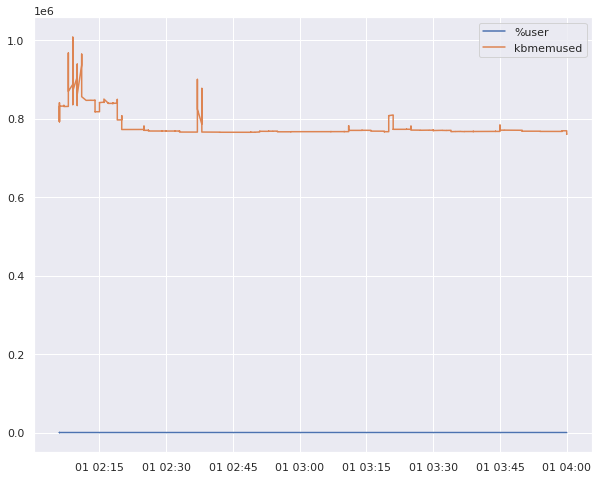

In [26]:
lines = plt.plot(subframe)
plt.legend(lines, subframe.columns)

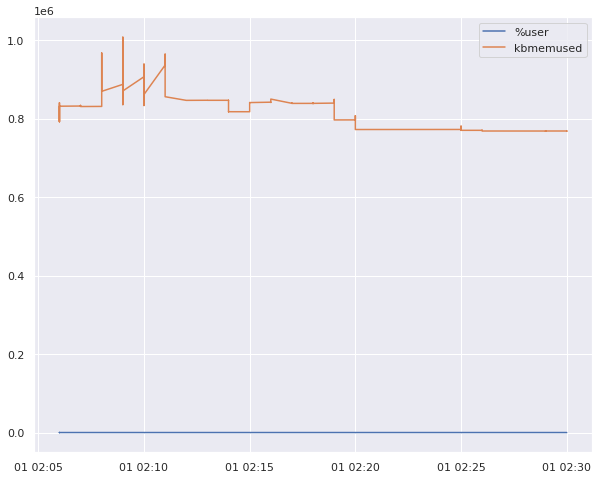

In [27]:
lines = plt.plot(subframe['2021-09-01 02:00':'2021-09-01 02:30'])
plt.legend(lines, subframe.columns)

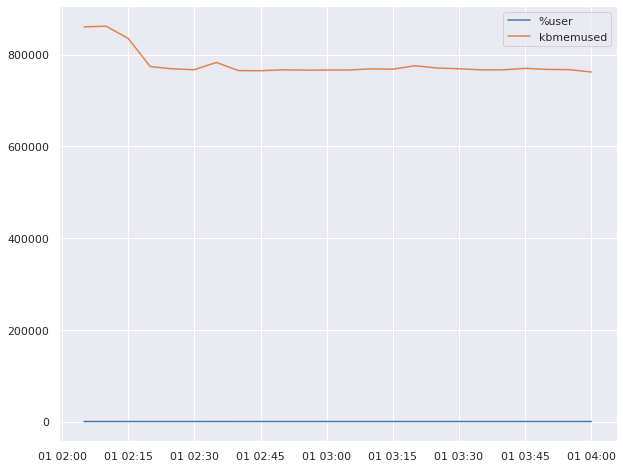

In [48]:
period = '5min'
agg_func = 'mean'
agg_data = subframe.resample(period).agg(agg_func)
lines = plt.plot(agg_data)
plt.legend(lines, agg_data.columns)

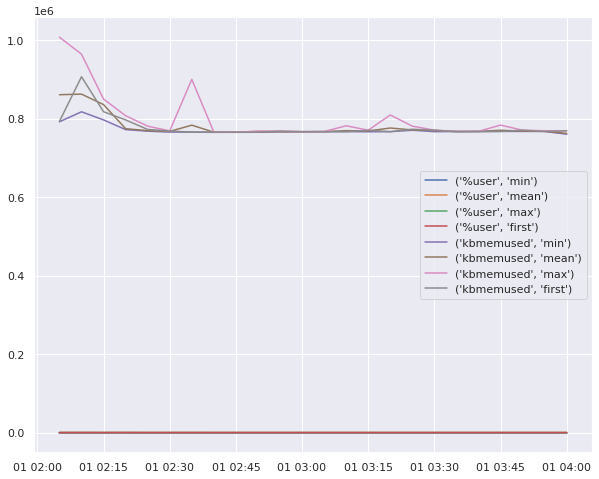

In [66]:
def first(data):
    return data.iloc[0]

period = '5min'
agg_func = ['min', 'mean', 'max', first]
agg_data = subframe.resample(period).agg(agg_func)
lines = plt.plot(agg_data)
plt.legend(lines, agg_data.columns)

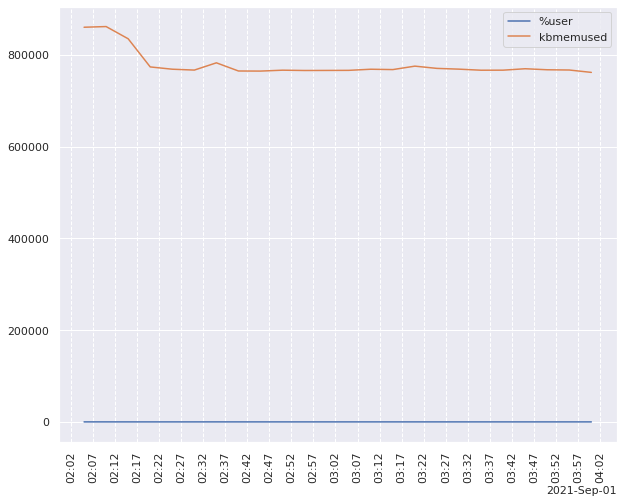

In [145]:
from matplotlib.dates import MinuteLocator, ConciseDateFormatter
period = '5min'
agg_func = 'mean'
agg_data = subframe.resample(period).agg(agg_func)
lines = plt.plot(agg_data)
plt.legend(lines, agg_data.columns)
ax = plt.gca()

locator = MinuteLocator(interval=5)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(ConciseDateFormatter(locator))

ax.xaxis.set_tick_params('major', rotation=90, grid_linestyle='--')
plt.show()

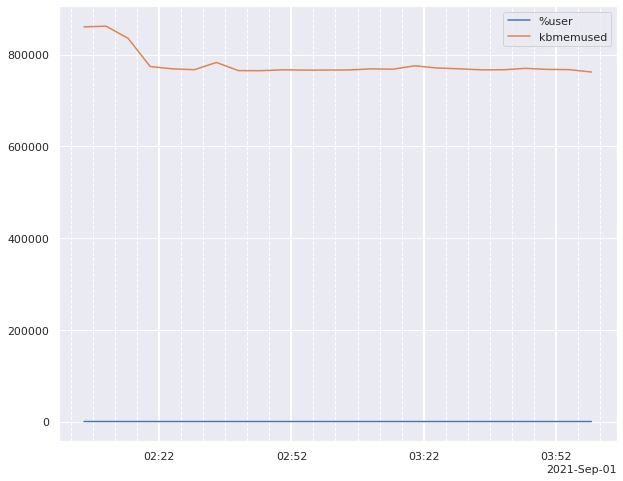

In [142]:
from matplotlib.dates import MinuteLocator, ConciseDateFormatter
period = '5min'
agg_func = 'mean'
agg_data = subframe.resample(period).agg(agg_func)
lines = plt.plot(agg_data)
plt.legend(lines, agg_data.columns)
ax = plt.gca()

locator = MinuteLocator(interval=30)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(ConciseDateFormatter(locator))

locator = MinuteLocator(interval=5)
ax.xaxis.set_minor_locator(locator)

ax.xaxis.set_tick_params('major', grid_lw=2)
ax.xaxis.set_tick_params('minor', gridOn=True, grid_linestyle='--')

plt.show()

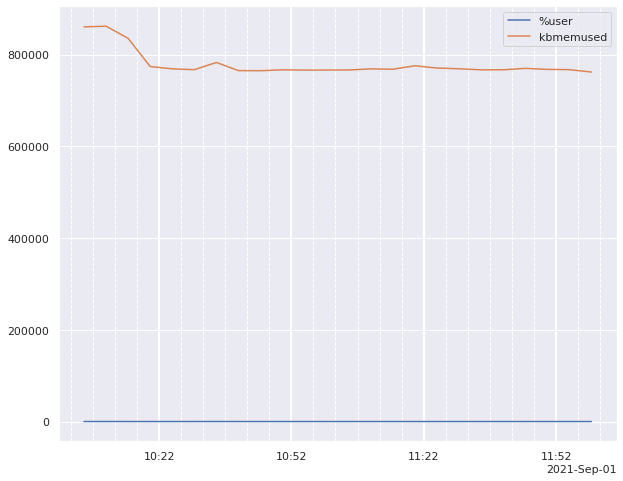

In [147]:
from matplotlib.dates import MinuteLocator, ConciseDateFormatter
import pytz

tz = pytz.timezone('Asia/Shanghai')
period = '5min'
agg_func = 'mean'
agg_data = subframe.resample(period).agg(agg_func)
lines = plt.plot(agg_data)
plt.legend(lines, agg_data.columns)
ax = plt.gca()

locator = MinuteLocator(interval=30)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(ConciseDateFormatter(locator, tz=tz))

locator = MinuteLocator(interval=5)
ax.xaxis.set_minor_locator(locator)

ax.xaxis.set_tick_params('major', grid_lw=2)
ax.xaxis.set_tick_params('minor', gridOn=True, grid_linestyle='--')

plt.show()

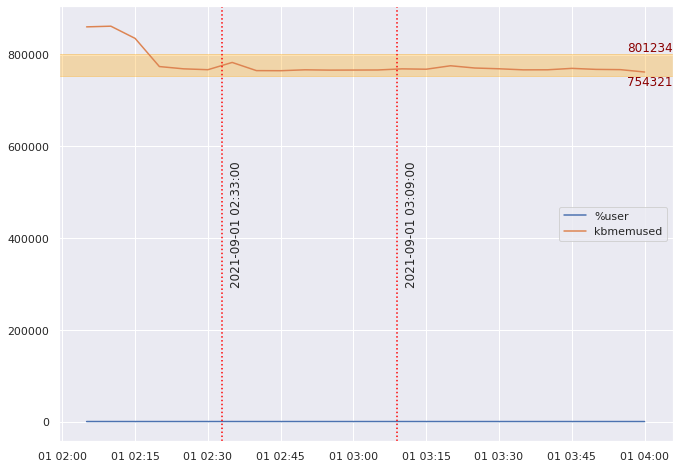

In [231]:
from itertools import cycle
from matplotlib.transforms import blended_transform_factory

alarms = ['2021-09-01 02:33', '2021-09-01 03:09']
special_zone = [754321, 801234]

period = '5min'
agg_func = 'mean'
agg_data = subframe.resample(period).agg(agg_func)

fig, ax = plt.subplots()
lines = ax.plot(agg_data)
for alarm in alarms:
  alarm = pd.to_datetime(alarm)
  ax.axvline(alarm, color='red', linestyle=':')
  ax.text(
      alarm, 0.5, '\n' + str(alarm),
      transform=blended_transform_factory(ax.transData, ax.transAxes),
      rotation=90, verticalalignment='center', linespacing=0.5
  )
ax.axhspan(*special_zone, color='orange', alpha=0.3)
for va, y in zip(cycle(['top', 'bottom']), special_zone):
  ax.text(
      1, y, y,
      transform=blended_transform_factory(ax.transAxes, ax.transData),
      verticalalignment=va, horizontalalignment='right', color='darkred'
  )

ax.legend(lines, agg_data.columns, loc='right')
fig.show()

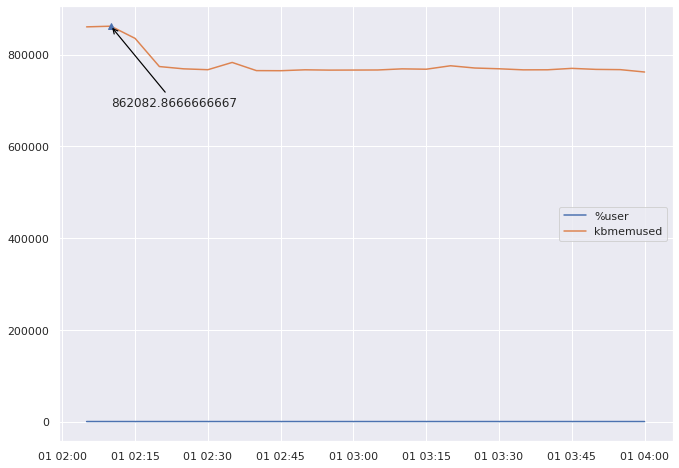

In [286]:
from itertools import cycle

period = '5min'
agg_func = 'mean'
agg_data = subframe.resample(period).agg(agg_func)

fig, ax = plt.subplots()
lines = ax.plot(agg_data)

peak_idx = agg_data.index[agg_data['kbmemused'].argmax()]
peak = agg_data['kbmemused'].max()

ax.plot([peak_idx], [peak], 'b^')
arrowprops = dict(
    arrowstyle="->",
    color='black',
    linewidth=1.2,
)
ax.annotate(
    peak, (peak_idx, peak), xytext=(0, -80), textcoords='offset points',
    arrowprops=arrowprops
)

ax.legend(lines, agg_data.columns, loc='right')
fig.show()

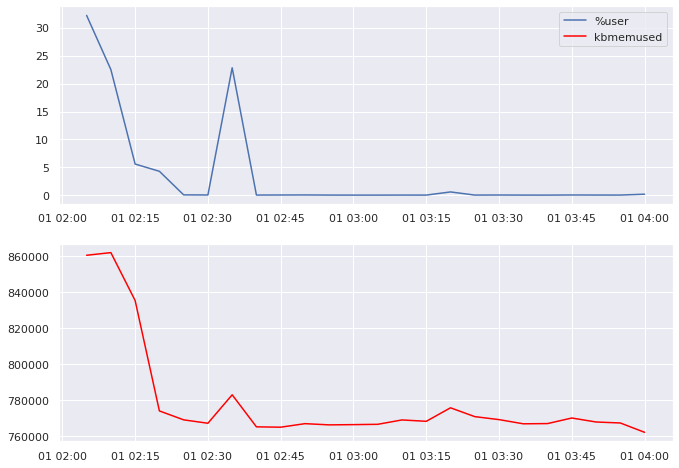

In [304]:
from itertools import cycle

period = '5min'
agg_func = 'mean'
agg_data = subframe.resample(period).agg(agg_func)

fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1)
lines1 = ax1.plot(agg_data.iloc[:, 0])
lines2 = ax2.plot(agg_data.iloc[:, 1], color='red')

ax1.legend(lines1+lines2, agg_data.columns)
fig.show()

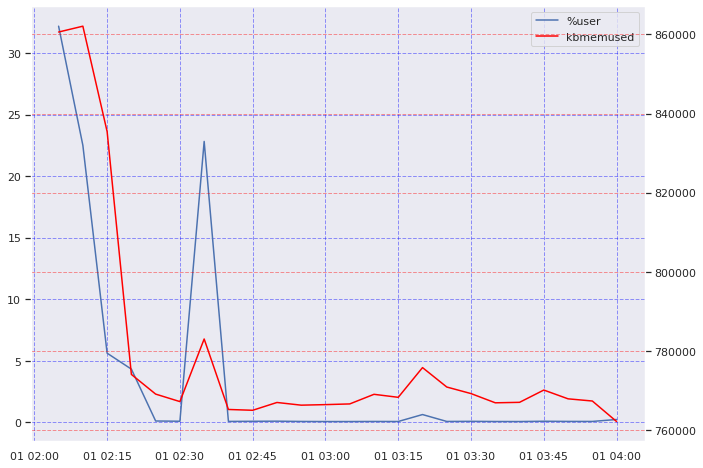

In [325]:
from itertools import cycle

period = '5min'
agg_func = 'mean'
agg_data = subframe.resample(period).agg(agg_func)

fig, ax1 = plt.subplots()
lines1 = ax1.plot(agg_data.iloc[:, 0])
ax1.grid(color='blue', alpha=0.4, linestyle='--')

ax2 = ax1.twinx()
lines2 = ax2.plot(agg_data.iloc[:, 1], color='red')
ax2.grid(color='red', alpha=0.4, linestyle='--')

ax1.legend(lines1+lines2, agg_data.columns)
fig.show()

In [326]:
fig.savefig('x.png')